In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from env import *

In [6]:
url = get_db_url('mall_customers')

In [17]:
query = '''
            SELECT *
            FROM customers
        '''

In [18]:
df = pd.read_sql(query,url)

In [19]:
df.head(5)

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
df['gender'].value_counts()

Female    112
Male       88
Name: gender, dtype: int64

In [23]:
def separate_columns(df):
    continuous_columns = []
    discrete_columns = []
    for column in df.columns:
        if (df[column].dtype == 'int' or df[column].dtype == 'float') and ('id' not in column):
            continuous_columns.append(column)
        elif (df[column].dtype == 'int' or df[column].dtype == 'float') and ('id' in column):
            discrete_columns.append(column)
            df[column] = df[column].astype(str)
        else:
            discrete_columns.append(column)
    
    return continuous_columns, discrete_columns

IndentationError: expected an indented block (1801489200.py, line 5)

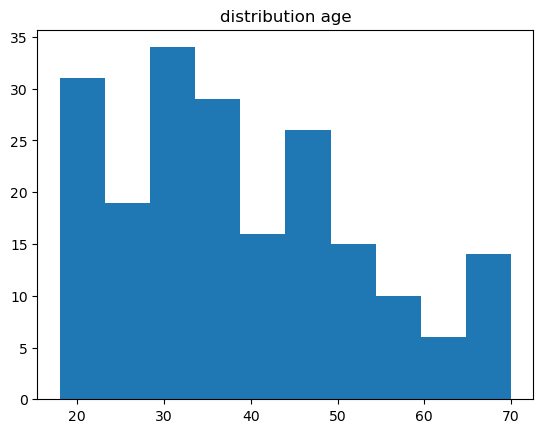

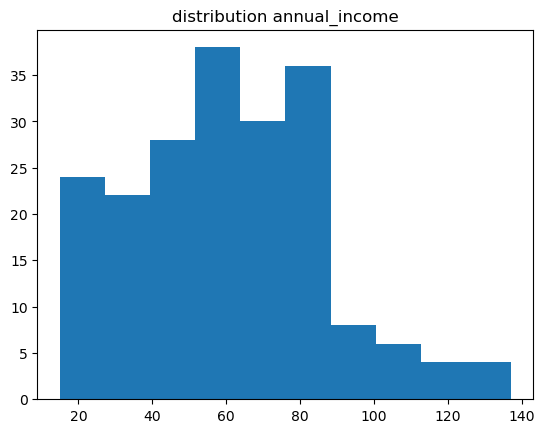

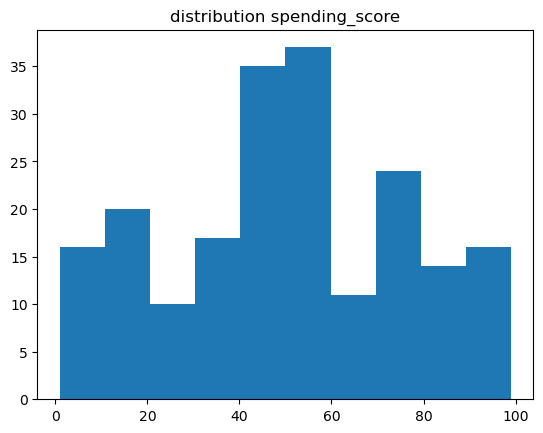

In [21]:
num_cols = ['age','annual_income','spending_score']
for col in num_cols:
    plt.hist(df[col])
    plt.title(f"distribution {col}")
    plt.show()

In [22]:
df.isnull().sum()

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

# Detect Outliers using IQR

# `IQR = q3-q1`

In [133]:
k=2
q1,q2,q3,q4 = .25,.50,.75,1
IQR = q3-q1

upper_bound=q3+k*IQR
lower_bound=q1-k*IQR

In [134]:
upper_bound

1.75

In [135]:
lower_bound

-0.75

In [ ]:
# 1.5, 2, 3

In [59]:
for i in range(1,4,1):
    print(i+.5)
    #print((i*1.5))

1.5
2.5
3.5


In [33]:
df['spending_score'].quantile([0.25,0.75])

0.25    34.75
0.75    73.00
Name: spending_score, dtype: float64

In [44]:
q1, q3 = df['spending_score'].quantile([0.25,0.75])
q1, q3

(34.75, 73.0)

In [45]:
ss_iqr = q3-q1
ss_iqr

38.25

In [46]:
k=1.5

ss_upper = q3+k*ss_iqr
ss_lower = q1-k*ss_iqr
ss_upper,ss_lower

(130.375, -22.625)

In [47]:
df['spending_score'].min()

1

In [48]:
df['spending_score'].max()

99

In [61]:
np.where(df['spending_score']>ss_upper,1,0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [69]:
def upper_outlier_detector(dataframe,column,k=1.5):
    q1,q3 = dataframe[column].quantile([0.25,0.75])
    iqr = q3-q1
    upper_bound = q3+k*iqr
    
    return np.where(dataframe[column]>upper_bound,1,0)

In [138]:
def lower_outlier_detector(dataframe,column,k=1.5):
    q1,q3 = dataframe[column].quantile([0.25,0.75])
    iqr = q3-q1
    
    lower_bound=q1-k*IQR

    return np.where(dataframe[column]<lower_bound,1,0)

In [70]:
my_list = ['age','annual_income']
for col in my_list:
    df[f'{col}_upper_outliers']=upper_outlier_detector(df,col)
df.head()

,customer_id,gender,age,annual_income,spending_score,age_upper_outliers,annual_income_upper_outliers
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,0


In [71]:
df[['age_upper_outliers','annual_income_upper_outliers']].sum()

age_upper_outliers              0
annual_income_upper_outliers    2
dtype: int64

In [72]:
df[df['annual_income_upper_outliers']==1]

,customer_id,gender,age,annual_income,spending_score,age_upper_outliers,annual_income_upper_outliers
198,199,Male,32,137,18,0,1
199,200,Male,30,137,83,0,1


In [73]:
df['annual_income'].mean()

60.56